In [1]:
import numpy as np
import pandas as pd

In [92]:
df=pd.read_csv('D:/pandas data analysis/csv data/pandas data analysis/titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### What are the different type of missing values?

#### 1. MCAR:
Missing completely at random(MCAR). 
Which means there will be no relationship between the missing values and other values in dataset.

  eg: Embarked refers to the stations. As per commonsense Embarked does not have any corelation to any other variables. But Age and Cabin have some corelation.
  
#### 2. MNAR:
Missing not at random(MNAR).
Which means there will be relationship between the missing values and other values in dataset.

  eg: Age and Cabin.
  
#### 3. MAR:
Missing at random(MAR)
  
  eg: men---salary
      female---age  (Hesitate to share data)
  

In [4]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### Trying to find the percentage of null values in Cabin variable

Now creating a new variable and going to assign 1 for nan and 0 for non nan  

In [5]:
df['cabin_nan']=np.where(df['Cabin'].isnull(),1,0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [6]:
df.cabin_nan.mean()

0.7710437710437711

# All the techniques of handling missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


## Mean/Median/Mode replacement

#### When should we apply?    When the missing values follows MCAR. Replace the nan with most frequent occurance of the variable

In [7]:
df=pd.read_csv('D:/pandas data analysis/csv data/pandas data analysis/titanic_data.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [9]:
### creating a function to fill nan with median

def impute_nan(df,variable):
    df[variable+'_median']=df['Age'].fillna(df['Age'].median())

In [10]:
impute_nan(df,'Age')

In [11]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [12]:
df[df['Age'].isnull()].head()

,Survived,Age,Fare,Age_median
5,0,NaN,8.4583,28.0
17,1,NaN,13.0000,28.0
19,1,NaN,7.2250,28.0
26,0,NaN,7.2250,28.0
28,1,NaN,7.8792,28.0


In [13]:
# NAN values are replaced with 28(median of age)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
import warnings

In [16]:
warnings.filterwarnings(action='ignore')

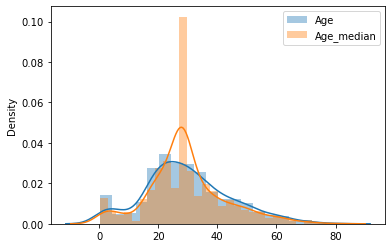

In [17]:
sns.distplot(df.Age,label='Age')
sns.distplot(df.Age_median,label='Age_median')
plt.xlabel(None)
plt.legend()

### Advantages 

1. Easy to implement
2. Faster way to obtain the complete dataset

### Disadvantage

1. Change or distortion in original variance
2. Impacts correlation

## 2. Random Sample Imputation

### Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

### When should it be used? It assumes that the data are missing completely at random(MCAR)

##### Both Random sample imputation and mean/median/mode are used when missing values are under  MCAR state

In [2]:
df=pd.read_csv('D:/pandas data analysis/csv data/pandas data analysis/titanic_data.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [5]:
# Replacing NAN values by Random values (Age variable)

In [6]:
df['Age'].isnull().sum()   #used to find no. of nan in age variable

177

In [7]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)  #Replacing the nan with random values.

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [8]:
df[df['Age'].isnull()].index          # Rows of nan values

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [9]:
def impute_nan(df,variable):
    df[variable+'_median']=df[variable].fillna(df[variable].median())
    df[variable+'_random']=df[variable]
    random_sample=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
    random_sample.index=df[df['Age'].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [10]:
impute_nan(df,'Age')

In [11]:
df[df.Age.isnull()].head()

,Survived,Age,Fare,Age_median,Age_random
5,0,NaN,8.4583,28.0,28.00
17,1,NaN,13.0000,28.0,50.00
19,1,NaN,7.2250,28.0,0.92
26,0,NaN,7.2250,28.0,36.00
28,1,NaN,7.8792,28.0,26.00


In [12]:
# comparing the distribution of age_median and age_random

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
import warnings
warnings.filterwarnings('ignore')

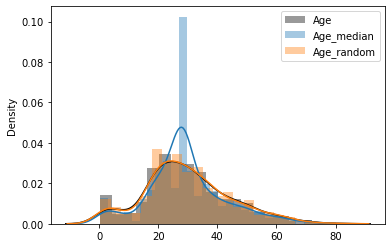

In [14]:
sns.distplot(df.Age,label='Age',color='black')
sns.distplot(df.Age_median,label='Age_median')
sns.distplot(df.Age_random,label='Age_random')
plt.xlabel(None)
plt.legend()

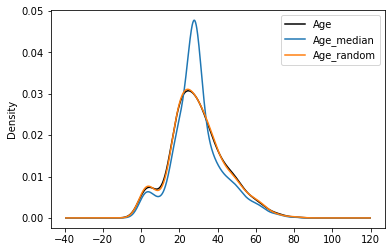

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax,color='black')
df['Age_median'].plot(kind='kde',ax=ax)
df['Age_random'].plot(kind='kde',ax=ax)
ax.legend()

### Advantage: 
1. Easy to implement
2. Less distortion in variance

### Disadvantage
1. Every situation randomness won't work

## 3. Capturing NAN values with new feature

### It works well if the data are not missing at random (MNAR)

In [16]:
df=pd.read_csv('D:/pandas data analysis/csv data/pandas data analysis/titanic_data.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [18]:
df.iloc[31:38]

,Survived,Age,Fare,Age_NAN
31,1,NaN,146.5208,1
32,1,NaN,7.7500,1
33,0,66.0,10.5000,0
34,0,28.0,82.1708,0
35,0,42.0,52.0000,0
36,1,NaN,7.2292,1
37,0,21.0,8.0500,0


In [19]:
df['Age_median']=df['Age'].fillna(df['Age'].median())

In [20]:
df.iloc[31:38]

,Survived,Age,Fare,Age_NAN,Age_median
31,1,NaN,146.5208,1,28.0
32,1,NaN,7.7500,1,28.0
33,0,66.0,10.5000,0,66.0
34,0,28.0,82.1708,0,28.0
35,0,42.0,52.0000,0,42.0
36,1,NaN,7.2292,1,28.0
37,0,21.0,8.0500,0,21.0


## Advantages
1. Easy to implement
2. Captures the importance of missing values

## Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

## 4. End of Distribution imputation

### It works well if the data are not missing at random (MNAR)

In [21]:
df=pd.read_csv('D:/pandas data analysis/csv data/pandas data analysis/titanic_data.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

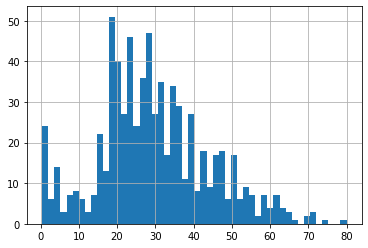

In [22]:
df.Age.hist(bins=50)

<AxesSubplot:xlabel='Age'>

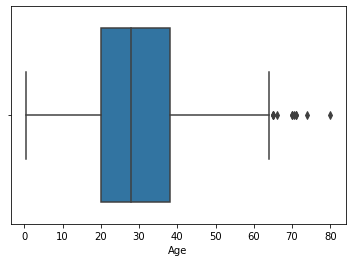

In [23]:
sns.boxplot(df.Age)

#### Outliers are found in right side. So we are replacing the nan values with end value(based on standard normal distribution 3rd SD value of right side). By doing this outliers are controlled.

In [24]:
extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406095

In [25]:
def impute_nan(df,variable,extreme):
    df[variable+'_end_of_dist']=df[variable].fillna(extreme)
    df[variable+'_median']=df[variable].fillna(df[variable].median())

In [26]:
impute_nan(df,'Age',extreme)

In [27]:
df.iloc[31:38]

,Survived,Age,Fare,Age_end_of_dist,Age_median
31,1,NaN,146.5208,73.27861,28.0
32,1,NaN,7.7500,73.27861,28.0
33,0,66.0,10.5000,66.00000,66.0
34,0,28.0,82.1708,28.00000,28.0
35,0,42.0,52.0000,42.00000,42.0
36,1,NaN,7.2292,73.27861,28.0
37,0,21.0,8.0500,21.00000,21.0


<AxesSubplot:>

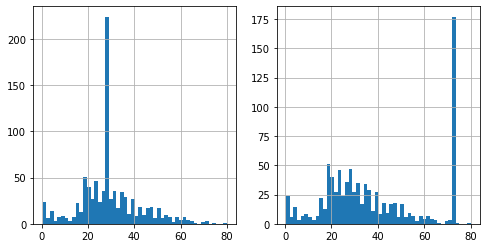

In [28]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
df.Age_median.hist(bins=50)
plt.subplot(1,2,2)
df.Age_end_of_dist.hist(bins=50)

<AxesSubplot:xlabel='Age_end_of_dist'>

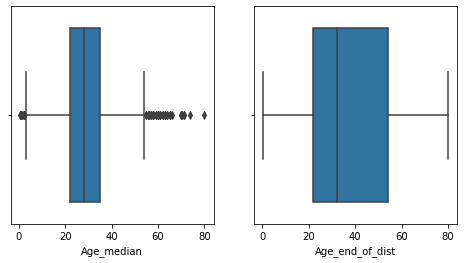

In [29]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.boxplot(df.Age_median)
plt.subplot(1,2,2)
sns.boxplot(df.Age_end_of_dist)

## Advantages

1. Easy to implement
2. Captures the importance of missingness if there is one

## Disadvantages

1. Distorts the original distribution of the variable
2. If the missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
3. If the number of nan is big, It will mask true outliers in the distribution
4. If the number of nan is small, the replaced nan may be considered as outliers and pre-processed in a subsequent step of feature engineering

## 5. Arbitrary imputation

#### Arbitrary value imputation consists of replacing all occurrences of missing values (NA) within a variable with an arbitrary value. The arbitrary value should be different from the mean or median and not within the normal values of the variable. 

This technique was used in kaggle competition. It consists of replacing nan by arbitrary values (mostly not used). This method for finding the importance of nan

In [30]:
df=pd.read_csv('D:/pandas data analysis/csv data/pandas data analysis/titanic_data.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

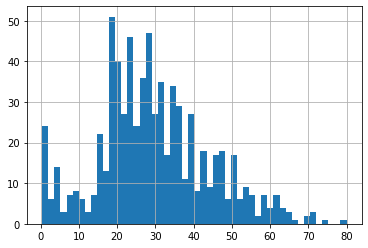

In [31]:
df.Age.hist(bins=50)

In [32]:
# Take outside value from this range (0-80)

In [33]:
def impute_nan(df,variable):
    df[variable+'_hundred']=df[variable].fillna(100)

In [34]:
impute_nan(df,'Age')

In [35]:
df.head(3)

,Survived,Age,Fare,Age_hundred
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0


## Advantages
1. Easy to implement
2. Captures the importance of missingess if there is one

## Disadvantages
1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
3. Hard to decide which value to use

## 6. Frequent categories imputation

#### This imputation is mostly used when the categorical nan value mean<40%. Replacing the nan with most frequent value in features

In [36]:
df=pd.read_csv('adv_house_pred.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [37]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [38]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [39]:
# finding the most repeated value in features and filling nan with it

In [40]:
def inpute_nan(df,variable):
    df[variable+'_freq']=df[variable].fillna(df[variable].value_counts().index[0])

In [41]:
for i in ['BsmtQual','FireplaceQu','GarageType']:
    inpute_nan(df,i)

In [42]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_freq,FireplaceQu_freq,GarageType_freq
0,Gd,NaN,Attchd,208500,Gd,Gd,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [43]:
# for comparision purpose

In [44]:
df['BsmtQual'].value_counts(), df['BsmtQual_freq'].value_counts()

(TA    649
 Gd    618
 Ex    121
 Fa     35
 Name: BsmtQual, dtype: int64,
 TA    686
 Gd    618
 Ex    121
 Fa     35
 Name: BsmtQual_freq, dtype: int64)

In [45]:
df['FireplaceQu'].value_counts(), df['FireplaceQu_freq'].value_counts()

(Gd    380
 TA    313
 Fa     33
 Ex     24
 Po     20
 Name: FireplaceQu, dtype: int64,
 Gd    1070
 TA     313
 Fa      33
 Ex      24
 Po      20
 Name: FireplaceQu_freq, dtype: int64)

In [46]:
df['GarageType'].value_counts(), df['GarageType_freq'].value_counts()

(Attchd     870
 Detchd     387
 BuiltIn     88
 Basment     19
 CarPort      9
 2Types       6
 Name: GarageType, dtype: int64,
 Attchd     951
 Detchd     387
 BuiltIn     88
 Basment     19
 CarPort      9
 2Types       6
 Name: GarageType_freq, dtype: int64)

In [47]:
df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1,inplace=True)

In [48]:
df.head()

,SalePrice,BsmtQual_freq,FireplaceQu_freq,GarageType_freq
0,208500,Gd,Gd,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


### Advantages
1. Easy To implement
2. Fater way to implement

### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label